# Submitted by Navneet Das 3433 Comp A

***'
Assignment 1 Deep Learning
Implement Boston housing price prediction problem regression methods using Deep Neural network. 
Use the Boston House price prediction dataset. 
Use Polynomial Regression, Lasso Regression, Partial least regression, Ordinal Regression, and linear & logistic regression. Compare the results for performance analysis
***

In [2]:
import numpy as np
import pandas as pd

In [3]:
data_url = "DeepLearningData/housing.xls"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
480,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
481,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
482,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [5]:
# from sklearn.datasets import load_boston
# boston = load_boston()

In [6]:
data = pd.DataFrame(raw_df)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6


In [8]:
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT',"PRICE"]

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,1.23247,0.0,8.14,0,0.538,6.142,91.7,3.9769,4,307.0,21.0,396.90,18.72,15.2
1,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307.0,21.0,394.54,19.88,14.5
2,0.75026,0.0,8.14,0,0.538,5.924,94.1,4.3996,4,307.0,21.0,394.33,16.30,15.6
3,0.84054,0.0,8.14,0,0.538,5.599,85.7,4.4546,4,307.0,21.0,303.42,16.51,13.9
4,0.67191,0.0,8.14,0,0.538,5.813,90.3,4.6820,4,307.0,21.0,376.88,14.81,16.6


In [10]:
data.to_csv("DeepLearningData/boston.csv",index=False)

In [11]:
print(data.shape)

(484, 14)


In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

No null values in the dataset, no missing value treatement needed

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000,484.000000
mean,3.759989,11.662190,11.330310,0.072314,0.556437,6.290605,68.518595,3.735627,9.807851,413.599174,18.463017,355.297190,12.679174,22.544008
std,8.766728,23.764895,6.936898,0.259275,0.118018,0.710895,28.447452,2.124833,8.813355,170.252171,2.145556,92.997197,7.167669,9.315331
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082155,0.000000,5.130000,0.000000,0.448000,5.884750,43.625000,2.064700,4.000000,279.000000,17.400000,374.650000,6.990000,16.775000
50%,0.262660,0.000000,9.900000,0.000000,0.538000,6.211500,77.700000,3.057250,5.000000,345.000000,19.100000,391.340000,11.360000,21.200000
75%,3.896877,20.000000,18.100000,0.000000,0.631000,6.630000,94.100000,5.116700,24.000000,666.000000,20.200000,396.215000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


This is sometimes very useful, for example if you look at the CRIM the max is 88.97 and 75% of the value is below 3.677083 and mean is 3.613524 so it means the max values is actually an outlier or there are outliers present in the column

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484 entries, 0 to 483
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     484 non-null    float64
 1   ZN       484 non-null    float64
 2   INDUS    484 non-null    float64
 3   CHAS     484 non-null    int64  
 4   NOX      484 non-null    float64
 5   RM       484 non-null    float64
 6   AGE      484 non-null    float64
 7   DIS      484 non-null    float64
 8   RAD      484 non-null    int64  
 9   TAX      484 non-null    float64
 10  PTRATIO  484 non-null    float64
 11  B        484 non-null    float64
 12  LSTAT    484 non-null    float64
 13  PRICE    484 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 53.1 KB


<a id = 'visual'></a>
# Visualisation

C:\Users\navne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE', ylabel='Density'>

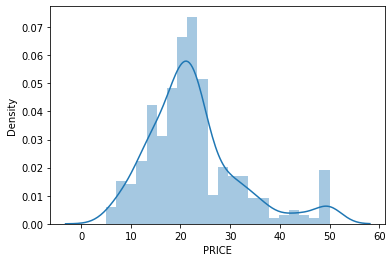

In [15]:
import seaborn as sns
sns.distplot(data.PRICE)

The distribution seems normal, has not be the data normal we would have perform log transformation or took to square root of the data to make the data normal. Normal distribution is need for the machine learning for better predictiblity of the model

C:\Users\navne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRICE'>

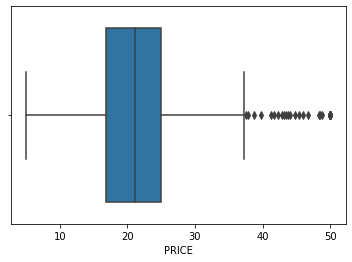

In [16]:
sns.boxplot(data.PRICE)

<a id = 'corr'></a>
### Checking the correlation of the independent feature with the dependent feature

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.An intelligent correlation analysis can lead to a greater understanding of your data

In [17]:
correlation = data.corr()
correlation.loc['PRICE']

CRIM      -0.393057
ZN         0.366270
INDUS     -0.488006
CHAS       0.176896
NOX       -0.427658
RM         0.693071
AGE       -0.374692
DIS        0.252464
RAD       -0.388123
TAX       -0.475074
PTRATIO   -0.525636
B          0.336935
LSTAT     -0.740927
PRICE      1.000000
Name: PRICE, dtype: float64

<AxesSubplot:>

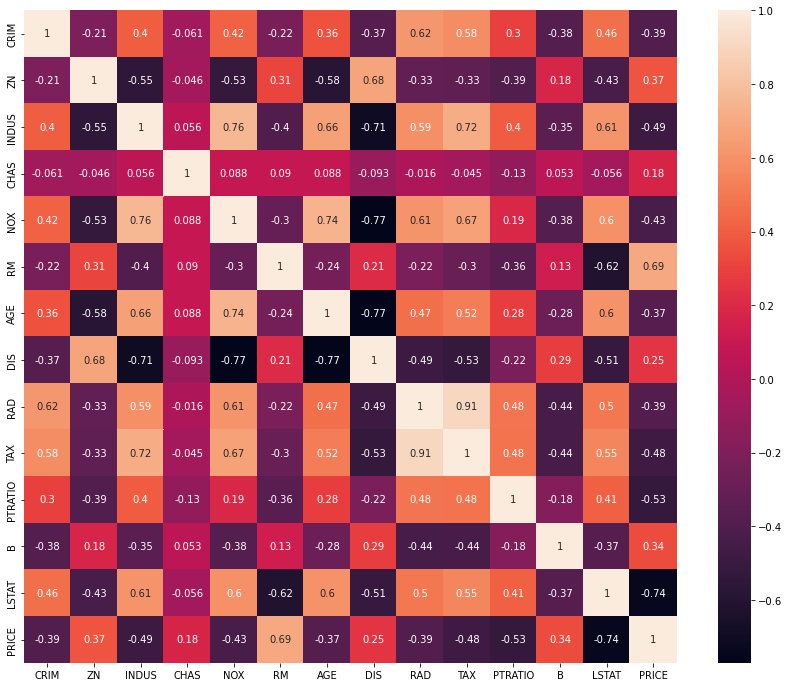

In [18]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(figsize=(15,12))
sns.heatmap(correlation,square = True,annot = True)

By looking at the correlation plot LSAT is negatively correlated with -0.75 and RM is positively correlated to the price and PTRATIO is correlated negatively with -0.51

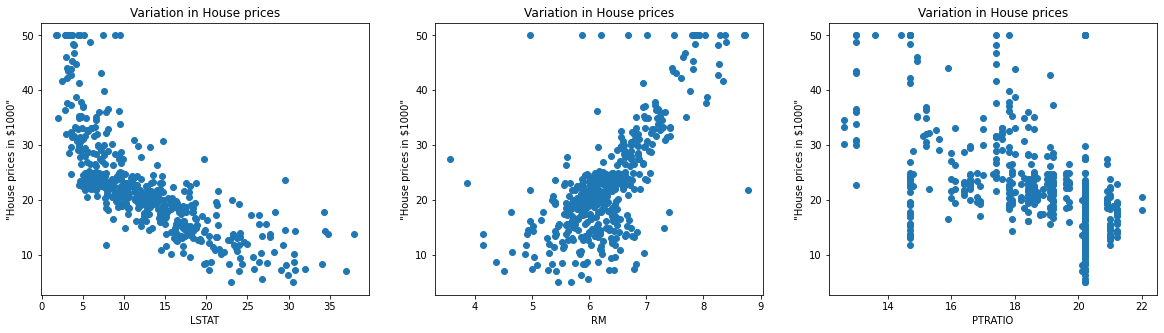

In [19]:
plt.figure(figsize = (20,5))
features = ['LSTAT','RM','PTRATIO']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = data.PRICE
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<a id = 'split'></a>
### Splitting the dependent feature and independent feature 

In [20]:
X = data.iloc[:,:-1]
y= data.PRICE

In [21]:
!pip install mord

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=5985 sha256=70da32e2bcb5889f91581a6e6d79f984c42ff2f7f928e6aaa53aa27651b8606b
  Stored in directory: c:\users\navne\appdata\local\pip\cache\wheels\1e\fa\70\c1078bd598530116799d668f190e1c52f713cd9329dcb2df37
Successfully built mord



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install tabulate


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_decomposition import PLSRegression
from mord import OrdinalRidge
from tabulate import tabulate



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial Regression
poly_reg = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_poly = poly_reg.predict(X_test)
poly_mse = mean_squared_error(y_test, y_pred_poly)
poly_r2 = r2_score(y_test, y_pred_poly)

# Lasso Regression
lasso_reg = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)

# Partial Least Squares Regression
pls_reg = make_pipeline(StandardScaler(), PLSRegression(n_components=5))
pls_reg.fit(X_train, y_train)
y_pred_pls = pls_reg.predict(X_test)
pls_mse = mean_squared_error(y_test, y_pred_pls)
pls_r2 = r2_score(y_test, y_pred_pls)

# Ordinal Regression
ordinal_reg = OrdinalRidge(alpha=0.1)
ordinal_reg.fit(X_train, y_train)
y_pred_ordinal = ordinal_reg.predict(X_test)
ordinal_mse = mean_squared_error(y_test, y_pred_ordinal)
ordinal_r2 = r2_score(y_test, y_pred_ordinal)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)


table = [
    ["Polynomial Regression", poly_mse, poly_r2],
    ["Lasso Regression", lasso_mse, lasso_r2],
    ["Partial Least Squares Regression", pls_mse, pls_r2],
    ["Ordinal Regression", ordinal_mse, ordinal_r2],
    ["Linear Regression", linear_mse, linear_r2]
]


headers = ["Model", "Mean Squared Error", "R2 Score"]
print(tabulate(table, headers, tablefmt="grid"))


+----------------------------------+----------------------+------------+
| Model                            |   Mean Squared Error |   R2 Score |
+==================================+======================+============+
| Polynomial Regression            |              15.367  |   0.825619 |
+----------------------------------+----------------------+------------+
| Lasso Regression                 |              19.8478 |   0.774772 |
+----------------------------------+----------------------+------------+
| Partial Least Squares Regression |              20.5179 |   0.767167 |
+----------------------------------+----------------------+------------+
| Ordinal Regression               |              20.4365 |   0.768091 |
+----------------------------------+----------------------+------------+
| Linear Regression                |              20.1437 |   0.771415 |
+----------------------------------+----------------------+------------+


<a id  = 'NN'></a>
## Neural Networks

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()

model.add(Dense(128,activation  = 'relu',input_dim =13))
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
# model.add(Dense(8,activation  = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [26]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [27]:
!pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [29]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 2ms/step - loss: 581.1647
Epoch 2/100
13/13 [==============================] - 0s 2ms/step - loss: 516.3430
Epoch 3/100
13/13 [==============================] - 0s 2ms/step - loss: 364.0336
Epoch 4/100
13/13 [==============================] - 0s 2ms/step - loss: 146.8736
Epoch 5/100
13/13 [==============================] - 0s 2ms/step - loss: 87.2210
Epoch 6/100
13/13 [==============================] - 0s 2ms/step - loss: 51.7952
Epoch 7/100
13/13 [==============================] - 0s 2ms/step - loss: 33.7812
Epoch 8/100
13/13 [==============================] - 0s 2ms/step - loss: 28.0128
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 24.6328
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss: 21.5407
Epoch 11/100
13/13 [==============================] - 0s 2ms/step - loss: 19.6116
Epoch 12/100
13/13 [==============================] - 0s 2ms/step - loss: 18.0997
Epoch 13/100
13/13 [=

<a id = 'eval'></a>
### Evaluation of the model

In [30]:
y_pred_nn = model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred_nn)

4/4 [==============================] - 0s 2ms/step


In [31]:
from sklearn.metrics import r2_score
nn_r2 = r2_score(y_test, y_pred_nn)
print(nn_r2)

0.910074742473124


In [32]:
table = [
    ["Polynomial Regression", poly_mse, poly_r2],
    ["Lasso Regression", lasso_mse, lasso_r2],
    ["Partial Least Squares Regression", pls_mse, pls_r2],
    ["Ordinal Regression", ordinal_mse, ordinal_r2],
    ["Linear Regression", linear_mse, linear_r2],
    ["Neural Network Regression Model",nn_mse,nn_r2 ]
]


headers = ["Model", "Mean Squared Error", "R2 Score"]
print(tabulate(table, headers, tablefmt="markdown"))

Model                               Mean Squared Error    R2 Score
--------------------------------  --------------------  ----------
Polynomial Regression                         15.367      0.825619
Lasso Regression                              19.8478     0.774772
Partial Least Squares Regression              20.5179     0.767167
Ordinal Regression                            20.4365     0.768091
Linear Regression                             20.1437     0.771415
Neural Network Regression Model                7.92449    0.910075


13/13 [==============================] - 0s 1ms/step - loss: 2.0599


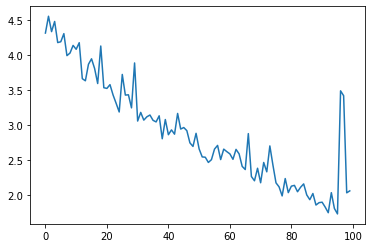

In [33]:
lossv = []
for epoch in range (100):
    history = model.fit(X_train, y_train, epochs = 1)
    lossv += history.history['loss']
    
plt.plot(lossv)